In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

In [ ]:
hdfc_data=pd.read_csv('HDB.csv');hdfc_data


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-20,75.959999,76.790001,75.599998,76.739998,75.871620,1073800
1,2021-08-23,76.940002,78.000000,76.879997,77.349998,76.474716,1868000
2,2021-08-24,78.690002,78.800003,77.250000,77.790001,76.909744,1301200
3,2021-08-25,77.970001,78.570000,77.540001,78.480003,77.591934,2176500
4,2021-08-26,78.230003,78.400002,77.199997,77.250000,76.375854,909700
...,...,...,...,...,...,...,...
247,2022-08-15,65.849998,65.970001,65.290001,65.760002,65.760002,1719600
248,2022-08-16,65.940002,66.480003,64.709999,64.940002,64.940002,1298800
249,2022-08-17,64.629997,64.830002,64.080002,64.610001,64.610001,861000
250,2022-08-18,64.529999,64.779999,64.190002,64.620003,64.620003,994400


In [ ]:
hdfc_data['Date'] = pd.to_datetime(hdfc_data['Date'], format='%Y-%m-%d')
hdfc_data = hdfc_data.sort_values(by='Date',ascending=True)
hdfc_data['Date'] = hdfc_data['Date'].dt.strftime('%d-%m-%Y') 
hdfc_data.set_index('Date',drop=True,inplace=True) 
hdfc_data.head(15)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
20-08-2021,75.959999,76.790001,75.599998,76.739998,75.871620,1073800
23-08-2021,76.940002,78.000000,76.879997,77.349998,76.474716,1868000
24-08-2021,78.690002,78.800003,77.250000,77.790001,76.909744,1301200
25-08-2021,77.970001,78.570000,77.540001,78.480003,77.591934,2176500
26-08-2021,78.230003,78.400002,77.199997,77.250000,76.375854,909700
27-08-2021,77.629997,78.330002,77.320000,77.930000,77.048157,1107200
30-08-2021,78.400002,78.900002,77.980003,78.160004,77.275558,1923600
31-08-2021,79.250000,79.389999,78.169998,78.309998,77.423859,1653000
01-09-2021,78.849998,79.010002,78.320000,78.849998,77.957748,2447400


In [ ]:
data = hdfc_data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis = 1); data

,Close
Date,
20-08-2021,76.739998
23-08-2021,77.349998
24-08-2021,77.790001
25-08-2021,78.480003
26-08-2021,77.250000
...,...
15-08-2022,65.760002
16-08-2022,64.940002
17-08-2022,64.610001


In [ ]:
date = list(hdfc_data.index)

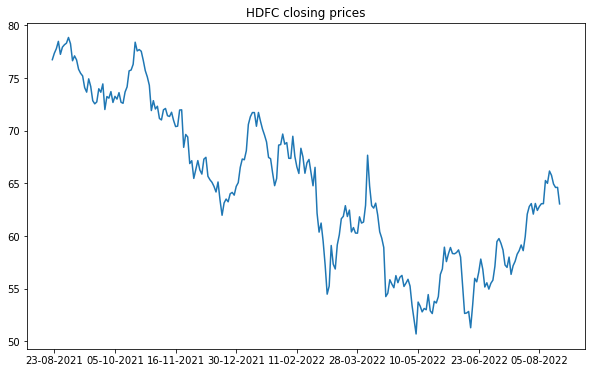

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(data)
index = np.arange(1,248,30)
plt.xticks(index, labels = date[1:248:30])
plt.title('HDFC closing prices')
plt.show()

In [ ]:
def load_data(stock, look_back):
    data_raw = stock # convert to numpy array
    data = []
    
    # create all possible sequences of length look_back
    for index in range(len(data_raw) - look_back): 
        data.append(data_raw[index: index + look_back])
    
    data = np.array(data);
    test_set_size = int(np.round(0.25*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    date_train = date[10:train_set_size+10]

    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    date_test = date[train_set_size+10:-1]
    #return [x_train, y_train, x_test, y_test]
    return [x_train, y_train, date_train, x_test, y_test, date_test]

In [ ]:
sc = MinMaxScaler()
data = sc.fit_transform(data)

x_train, y_train, date_train, x_test, y_test, date_test = load_data(data, 11)

print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('date_train length = ', len(date_train))
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)
print('date_test length = ', len(date_test))

x_train.shape =  (181, 10, 1)
y_train.shape =  (181, 1)
date_train length =  181
x_test.shape =  (60, 10, 1)
y_test.shape =  (60, 1)
date_test length =  60


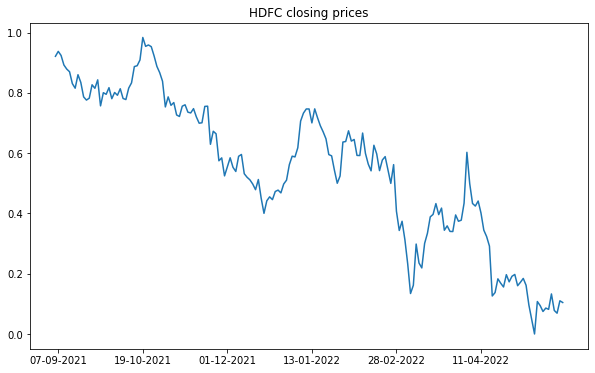

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_train)
index = np.arange(1,178,30)
plt.xticks(index, labels = date_train[1:178:30])
plt.title('HDFC closing prices')
plt.show()

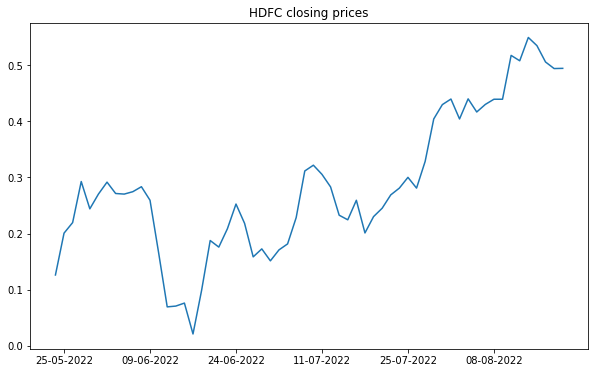

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_test)
index = np.arange(1,59,10)
plt.xticks(index, labels = date_test[1:59:10])
plt.title('HDFC closing prices')
plt.show()

In [ ]:
# make training and test sets in torch
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [ ]:
# Build model
#####################
input_dim = 1
hidden_dim = 10
num_layers = 4 
output_dim = 1


# Here we define our model as a class
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.num_layers = num_layers

        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Index hidden state of last time step
        # out.size() --> 100, 32, 100
        # out[:, -1, :] --> 100, 100 --> just want last time step hidden states! 
        out = self.fc(out[:, -1, :]) 
        # out.size() --> 100, 10
        return out
    
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

loss_fn = torch.nn.MSELoss()

optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
print(model)
print(len(list(model.parameters())))
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())

LSTM(
  (lstm): LSTM(1, 10, num_layers=4, batch_first=True)
  (fc): Linear(in_features=10, out_features=1, bias=True)
)
18
torch.Size([40, 1])
torch.Size([40, 10])
torch.Size([40])
torch.Size([40])
torch.Size([40, 10])
torch.Size([40, 10])
torch.Size([40])
torch.Size([40])
torch.Size([40, 10])
torch.Size([40, 10])
torch.Size([40])
torch.Size([40])
torch.Size([40, 10])
torch.Size([40, 10])
torch.Size([40])
torch.Size([40])
torch.Size([1, 10])
torch.Size([1])


In [ ]:
sum(i.numel() for i in model.parameters())

3171

In [ ]:
num_epochs = 550
hist = np.zeros(num_epochs)

# Number of steps to unroll
seq_dim =10


for t in range(num_epochs):
    # Initialise hidden state
    # Don't do this if you want your LSTM to be stateful
    #model.hidden = model.init_hidden()
    
    # Forward pass
    y_train_pred = model(x_train)

    loss = loss_fn(y_train_pred, y_train)
    if t % 10 == 0 and t !=0:
        print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    # Zero out gradient, else they will accumulate between epochs
    optimiser.zero_grad()

    # Backward pass
    loss.backward()

    # Update parameters
    optimiser.step()

Epoch  10 MSE:  0.06136738136410713
Epoch  20 MSE:  0.06099896878004074
Epoch  30 MSE:  0.06046011671423912
Epoch  40 MSE:  0.05295650288462639
Epoch  50 MSE:  0.028772100806236267
Epoch  60 MSE:  0.030135557055473328
Epoch  70 MSE:  0.02753690630197525
Epoch  80 MSE:  0.01764507405459881
Epoch  90 MSE:  0.011327212676405907
Epoch  100 MSE:  0.008370047435164452
Epoch  110 MSE:  0.0067758639343082905
Epoch  120 MSE:  0.0050552827306091785
Epoch  130 MSE:  0.0040185535326600075
Epoch  140 MSE:  0.0035526687279343605
Epoch  150 MSE:  0.003105486510321498
Epoch  160 MSE:  0.0028324993327260017
Epoch  170 MSE:  0.002733080880716443
Epoch  180 MSE:  0.00264977035112679
Epoch  190 MSE:  0.002603012602776289
Epoch  200 MSE:  0.00255484483204782
Epoch  210 MSE:  0.0031585711985826492
Epoch  220 MSE:  0.0025472790002822876
Epoch  230 MSE:  0.002568615134805441
Epoch  240 MSE:  0.0024928259663283825
Epoch  250 MSE:  0.0024370767641812563
Epoch  260 MSE:  0.0024059603456407785
Epoch  270 MSE:  0.

In [ ]:
# make predictions
y_test_pred = model(x_test)
y_train_pred = model(x_train)



# invert predictions
y_train_pred = sc.inverse_transform(y_train_pred.data.numpy())
y_train = sc.inverse_transform(y_train.data.numpy())
y_test_pred = sc.inverse_transform(y_test_pred.data.numpy())
y_test = sc.inverse_transform(y_test.data.numpy())

# calculate root mean squared error
trainScore = sqrt(mse(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = sqrt(mse(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.19 RMSE
Test Score: 1.27 RMSE


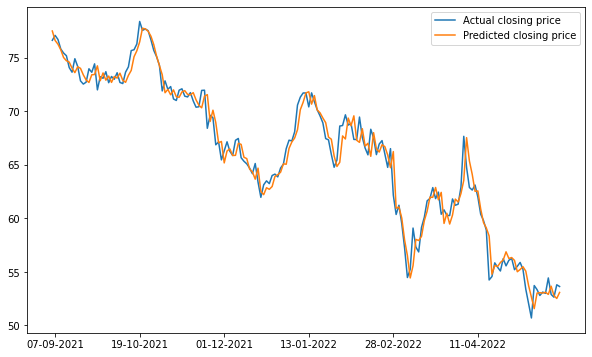

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_train, label = 'Actual closing price')
plt.plot(y_train_pred, label = 'Predicted closing price')
index = np.arange(1,178,30)

plt.xticks(index, labels = date_train[1:178:30])
plt.legend()
plt.show()

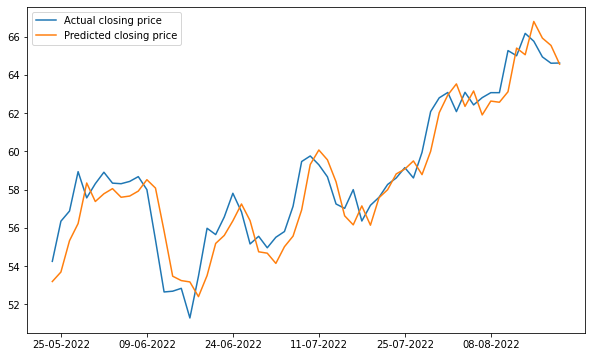

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_test, label = 'Actual closing price')
plt.plot(y_test_pred, label = 'Predicted closing price')
index = np.arange(1,59,10)
plt.xticks(index, labels = date_test[1:59:10])
plt.legend()
plt.show()